## Carrega as bibliotecas e a base da dados

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("../data/dataset_categorizado.csv")

## Como estão distribuidos os grupos?

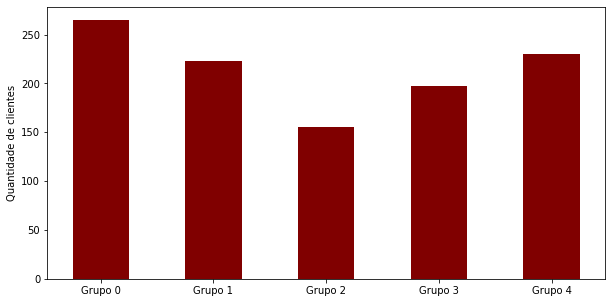

In [3]:
grupos = list(set(dataset["grupo_cliente"].values))
x, y = [], []

for grupo in grupos:
    x.append(f"Grupo {grupo}")
    y.append(list(dataset["grupo_cliente"].values).count(grupo))
    
plt.figure(figsize=(10, 5))
plt.bar(x, y, color="maroon", width=0.5)
plt.ylabel("Quantidade de clientes")
plt.show()

## O que cada grupo compra?

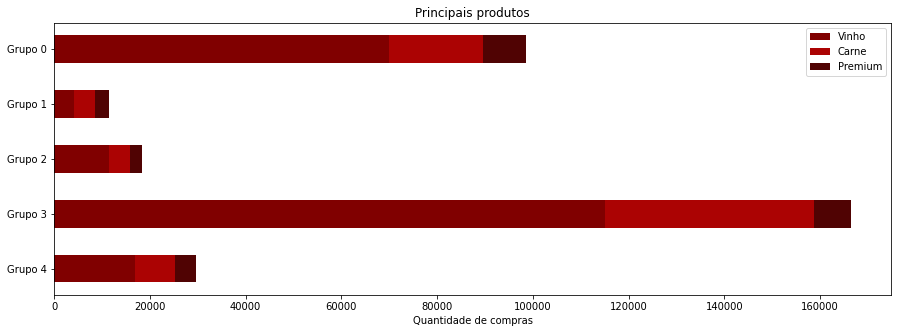

In [4]:
largura = 0.5
grupos = list(set(dataset["grupo_cliente"].values))
x, vinho, carne, fruta, peixe, doce, gold = [], [], [], [], [], [], []

for grupo in grupos:
    x.append(f"Grupo {grupo}")
    vinho.append(sum(dataset.loc[dataset["grupo_cliente"] == grupo]["MntWines"].values))
    carne.append(sum(dataset.loc[dataset["grupo_cliente"] == grupo]["MntMeatProducts"].values))
    fruta.append(sum(dataset.loc[dataset["grupo_cliente"] == grupo]["MntFruits"].values))
    peixe.append(sum(dataset.loc[dataset["grupo_cliente"] == grupo]["MntFishProducts"].values))
    doce.append(sum(dataset.loc[dataset["grupo_cliente"] == grupo]["MntSweetProducts"].values))
    gold.append(sum(dataset.loc[dataset["grupo_cliente"] == grupo]["MntGoldProds"].values))
    
fig, ax = plt.subplots(figsize=(15, 5))
ax.barh(x, vinho, largura, label="Vinho", color="#800000")
empilhar = vinho

ax.barh(x, carne, largura, label="Carne", left=empilhar, color="#ab0303")
empilhar = [sum(v) for v in zip(empilhar, carne)]

ax.barh(x, gold, largura, label="Premium", left=empilhar, color="#500303")

ax.invert_yaxis()
ax.legend()

plt.xlabel("Quantidade de compras")
plt.title("Principais produtos")
plt.show()

## Como os grupos reagem às promoções?

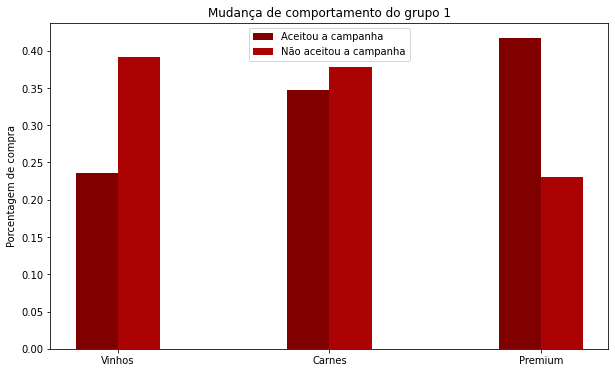

In [31]:
aceito = dataset.loc[dataset["Response"] == 1]
negado = dataset.loc[dataset["Response"] == 0]

x, y_aceito, y_negado = [], [], []
largura = 0.2
grupo = 1

produtos = {
    "MntWines": "Vinhos",
    "MntMeatProducts": "Carnes",
    "MntGoldProds": "Premium"
}

posicoes = [i for i in range(0, len(produtos.keys()))]
for campo in produtos.keys():
    x.append(produtos[campo])
    
    subset = aceito.loc[aceito["grupo_cliente"] == grupo]
    atual = sum(subset[campo].values)
    total = sum(np.sum(subset[produtos.keys()]).values)
    y_aceito.append(atual / total)
    
    subset = negado.loc[negado["grupo_cliente"] == grupo]
    atual = sum(subset[campo].values)
    total = sum(np.sum(subset[produtos.keys()]).values)
    y_negado.append(atual / total)
    
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar([g - largura / 2 for g in posicoes], y_aceito, largura, label="Aceitou a campanha", color="#800000")
ax.bar([g + largura / 2 for g in posicoes], y_negado, largura, label="Não aceitou a campanha", color="#ab0303")
ax.set_xticks(posicoes, x)

plt.ylabel("Porcentagem de compra")
plt.title(f"Mudança de comportamento do grupo {grupo}")
plt.legend(loc="upper center")
plt.show()